In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('DailyTemps.csv',index_col='DATE',parse_dates=True)
df = df.dropna()
df.head()

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,24.0,38.0,31.0,658,1758


In [3]:
df.isnull().sum()

MinTemp    0
MaxTemp    0
AvgTemp    0
Sunrise    0
Sunset     0
dtype: int64

In [4]:
df.dropna(inplace=True)

<Axes: xlabel='DATE'>

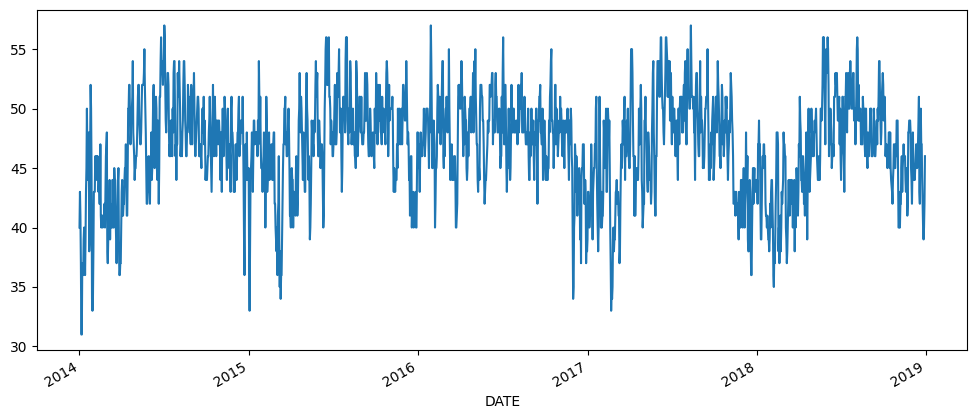

In [5]:
df['AvgTemp'].plot(figsize=(12,5))

### Check for stationarity

In [6]:
from statsmodels.tsa.stattools import adfuller

In [7]:
def adfuller_test(dataset):
    adfull = adfuller(dataset, autolag='AIC')
    print("ADF: ", adfull[0])
    print("p_value: ", adfull[1])
    print("No of lag: ", adfull[2])
    print("Number of observation used for ADF regression and critical calculation: ", adfull[3])
    print("Critical value: ")
    for key, value in adfull[4].items():
        print("\t", key, ':', value)

In [8]:
adfuller_test(df['AvgTemp'])

ADF:  -6.554680125068785
p_value:  8.675937480199322e-09
No of lag:  12
Number of observation used for ADF regression and critical calculation:  1808
Critical value: 
	 1% : -3.433972018026501
	 5% : -2.8631399192826676
	 10% : -2.5676217442756872


#### Hence my dataset is stationary because my "p_value < 0.05" so we can proceed forward

### Now figure out order for ARIMA model

In [9]:
# from pmdarima import auto_arima

In [10]:
# stepwise_fit = auto_arima(df['AvgTemp'], trace=True, suppress_warnings=True)
# stepwise_fit.summary()

In [11]:
from statsmodels.tsa.arima.model import ARIMA

In [12]:
df.head(2)

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756


### Splitting the dataset

In [13]:
print(df.shape)
train = df.iloc[:-30]
test = df.iloc[-30:]
print(train.shape, test.shape)

(1821, 5)
(1791, 5) (30, 5)


In [21]:
model = ARIMA(train['AvgTemp'], order=(1,0,5))
model = model.fit()
model.summary()

C:\Users\ASUS\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                AvgTemp   No. Observations:                 1791
Model:                 ARIMA(1, 0, 5)   Log Likelihood               -4070.198
Date:                Sun, 07 May 2023   AIC                           8156.395
Time:                        05:56:46   BIC                           8200.320
Sample:                             0   HQIC                          8172.614
                               - 1791                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.5856      0.758     61.454      0.000      45.100      48.071
ar.L1          0.9856      0.005    188.230      0.000       0.975       0.996
ma.L1         -0.1412      0.023     -6.124      0.000      -0.186      -0.096
ma.L2         -0.2268      0.024     -9.635      0.000      -0.273      -0.181
ma.L3         -0.2168      0.023     -9.251      0.000      -0.263      -0.171
ma.L4         -0.1479      0.023     -6.491      0.000      -0.193      -0.103
ma.L5         -0.0595      0.024     -2.438      0.015      -0.107      -0.012
sigma2         5.5093      0.174     31.624      0.000       5.168       5.851
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                14.88
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                            -0.15
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

C:\Users\ASUS\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\ASUS\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\ASUS\miniconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='DATE'>

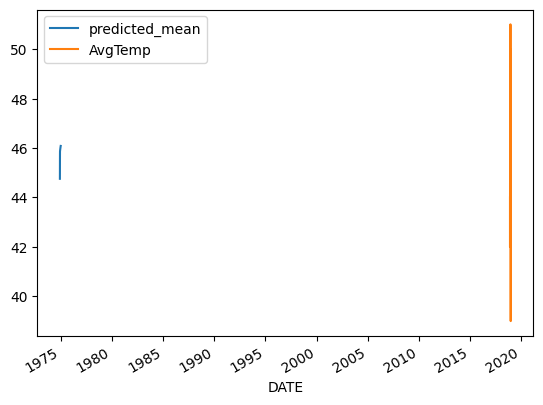

In [22]:
start = len(train)
end = start + len(test)-1
pred = model.predict(start=start, end=end, typ='levels')
# print(pred)
pred.plot(legend=True)
test['AvgTemp'].plot(legend=True)

In [16]:
# # if index is not date
# pred.index = df.index[start:end+1]

In [24]:
test['AvgTemp'].mean()

45.0

In [23]:
from sklearn.metrics import mean_squared_error
from math import sqrt

loss = sqrt(mean_squared_error(pred, test['AvgTemp']))
print(loss)

3.0004640041287756


In [30]:
model2 = ARIMA(df['AvgTemp'], order=(1,0,5))
model2 = model2.fit()
model2.summary()

C:\Users\ASUS\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                AvgTemp   No. Observations:                 1821
Model:                 ARIMA(1, 0, 5)   Log Likelihood               -4138.130
Date:                Sun, 07 May 2023   AIC                           8292.261
Time:                        06:03:26   BIC                           8336.318
Sample:                             0   HQIC                          8308.514
                               - 1821                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.5285      0.758     61.403      0.000      45.043      48.014
ar.L1          0.9860      0.005    192.909      0.000       0.976       0.996
ma.L1         -0.1403      0.023     -6.125      0.000      -0.185      -0.095
ma.L2         -0.2328      0.023    -10.038      0.000      -0.278      -0.187
ma.L3         -0.2163      0.023     -9.280      0.000      -0.262      -0.171
ma.L4         -0.1478      0.023     -6.542      0.000      -0.192      -0.104
ma.L5         -0.0587      0.024     -2.424      0.015      -0.106      -0.011
sigma2         5.5080      0.173     31.925      0.000       5.170       5.846
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                15.69
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.15
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
df.tail(2)

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2018-12-29,36.0,47.0,42.0,655,1753
2018-12-30,39.0,52.0,46.0,656,1754


In [34]:
index_future_date = pd.date_range(start='2018-12-30', end='2019-01-29')

In [38]:
pred = model2.predict(start=len(df), end=len(df)+30, typ='levels')
# print(pred)
pred.index = index_future_date
print(pred)

2018-12-30    46.418166
2018-12-31    46.113912
2019-01-01    45.617874
2019-01-02    45.249566
2019-01-03    45.116915
2019-01-04    45.136666
2019-01-05    45.156140
2019-01-06    45.175341
2019-01-07    45.194274
2019-01-08    45.212942
2019-01-09    45.231349
2019-01-10    45.249498
2019-01-11    45.267393
2019-01-12    45.285038
2019-01-13    45.302436
2019-01-14    45.319590
2019-01-15    45.336505
2019-01-16    45.353183
2019-01-17    45.369627
2019-01-18    45.385842
2019-01-19    45.401829
2019-01-20    45.417593
2019-01-21    45.433136
2019-01-22    45.448462
2019-01-23    45.463573
2019-01-24    45.478473
2019-01-25    45.493164
2019-01-26    45.507650
2019-01-27    45.521933
2019-01-28    45.536017
2019-01-29    45.549903
Freq: D, Name: predicted_mean, dtype: float64


C:\Users\ASUS\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<Axes: >

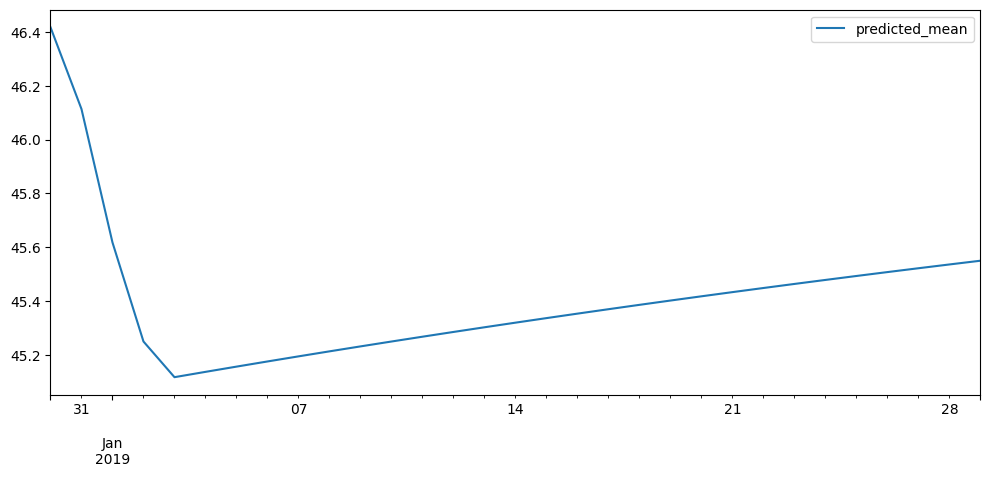

In [36]:
pred.plot(figsize=(12,5), legend=True)